# Multiple linear regression
In this Notebook, we'll be looking at _multiple linear regression_. Multiple linear regression is a linear model with multiple independent variables (predictors). We'll use a dataset from the website Mashable .

In [102]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Pre-processing

In [103]:
df = pd.read_csv('mashable.csv')
df = df.dropna() #Let's get rid of rows with empty cells, because they will trip up a lot of the analyses
df.head()

,id,url,n_tokens_title,n_tokens_content,num_imgs,num_videos,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,...,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,global_subjectivity,global_sentiment_polarity,title_subjectivity,title_sentiment_polarity,shares,shares_log
0,1,http://mashable.com/2013/10/29/ashton-kutcher-...,10,821,12,0,4.518879,0,0,0,...,0,0,0,0,0.439379,0.082486,0.666667,0.375,2100,3.322219
1,2,http://mashable.com/2014/09/08/mashies-sept-19...,9,489,6,0,5.040900,0,0,0,...,0,0,0,0,0.300454,0.027715,0.000000,0.000,274,2.437751
2,3,http://mashable.com/2013/02/01/hello-kitty-roc...,11,131,0,1,4.877863,0,0,0,...,1,0,0,0,0.575486,0.259120,0.000000,0.000,1500,3.176091
3,4,http://mashable.com/2014/02/06/add-us-on-snapc...,8,556,2,0,4.974820,0,0,1,...,0,0,0,0,0.327220,0.134424,0.000000,0.000,2000,3.301030
4,5,http://mashable.com/2014/01/07/lindsey-vonn-wi...,9,880,18,0,4.928409,0,0,0,...,0,0,0,0,0.507709,0.109256,0.000000,0.000,6000,3.778151


There are a number of variables, including a few so-called _dummy variables_ that indicate the genre of the movie with 0's and 1's (I left out many genres, so not all movies have a genre in this data set). Let's set ourselves the target of predicting the IMDB rating. Let's start with a scatterplot matrix.

In [104]:
df = df[["id", "n_tokens_content", "num_imgs", "num_videos", "global_sentiment_polarity", "title_sentiment_polarity", "shares", "shares_log"]]
df = df.sort_values(by='shares_log', ascending=False)
df.head(10)

,id,n_tokens_content,num_imgs,num_videos,global_sentiment_polarity,title_sentiment_polarity,shares,shares_log
15508,15509,688,15,1,0.186037,-0.300000,843300,5.925982
16736,16737,893,0,11,0.100533,0.000000,690400,5.839101
22572,22573,2591,1,1,0.075724,0.285714,663600,5.821906
2022,2023,134,0,2,0.004040,0.000000,652900,5.814847
8128,8129,382,11,1,0.125005,0.000000,617900,5.790918
11257,11258,192,0,2,0.138755,0.136364,310800,5.492481
7300,7301,905,21,0,0.121126,0.000000,306100,5.485863
19359,19360,198,14,1,-0.063636,-0.450000,298400,5.474799
4659,4660,390,0,16,0.262921,0.000000,233400,5.368101
15178,15179,506,1,0,0.145535,-0.400000,227300,5.356599


## Plotting

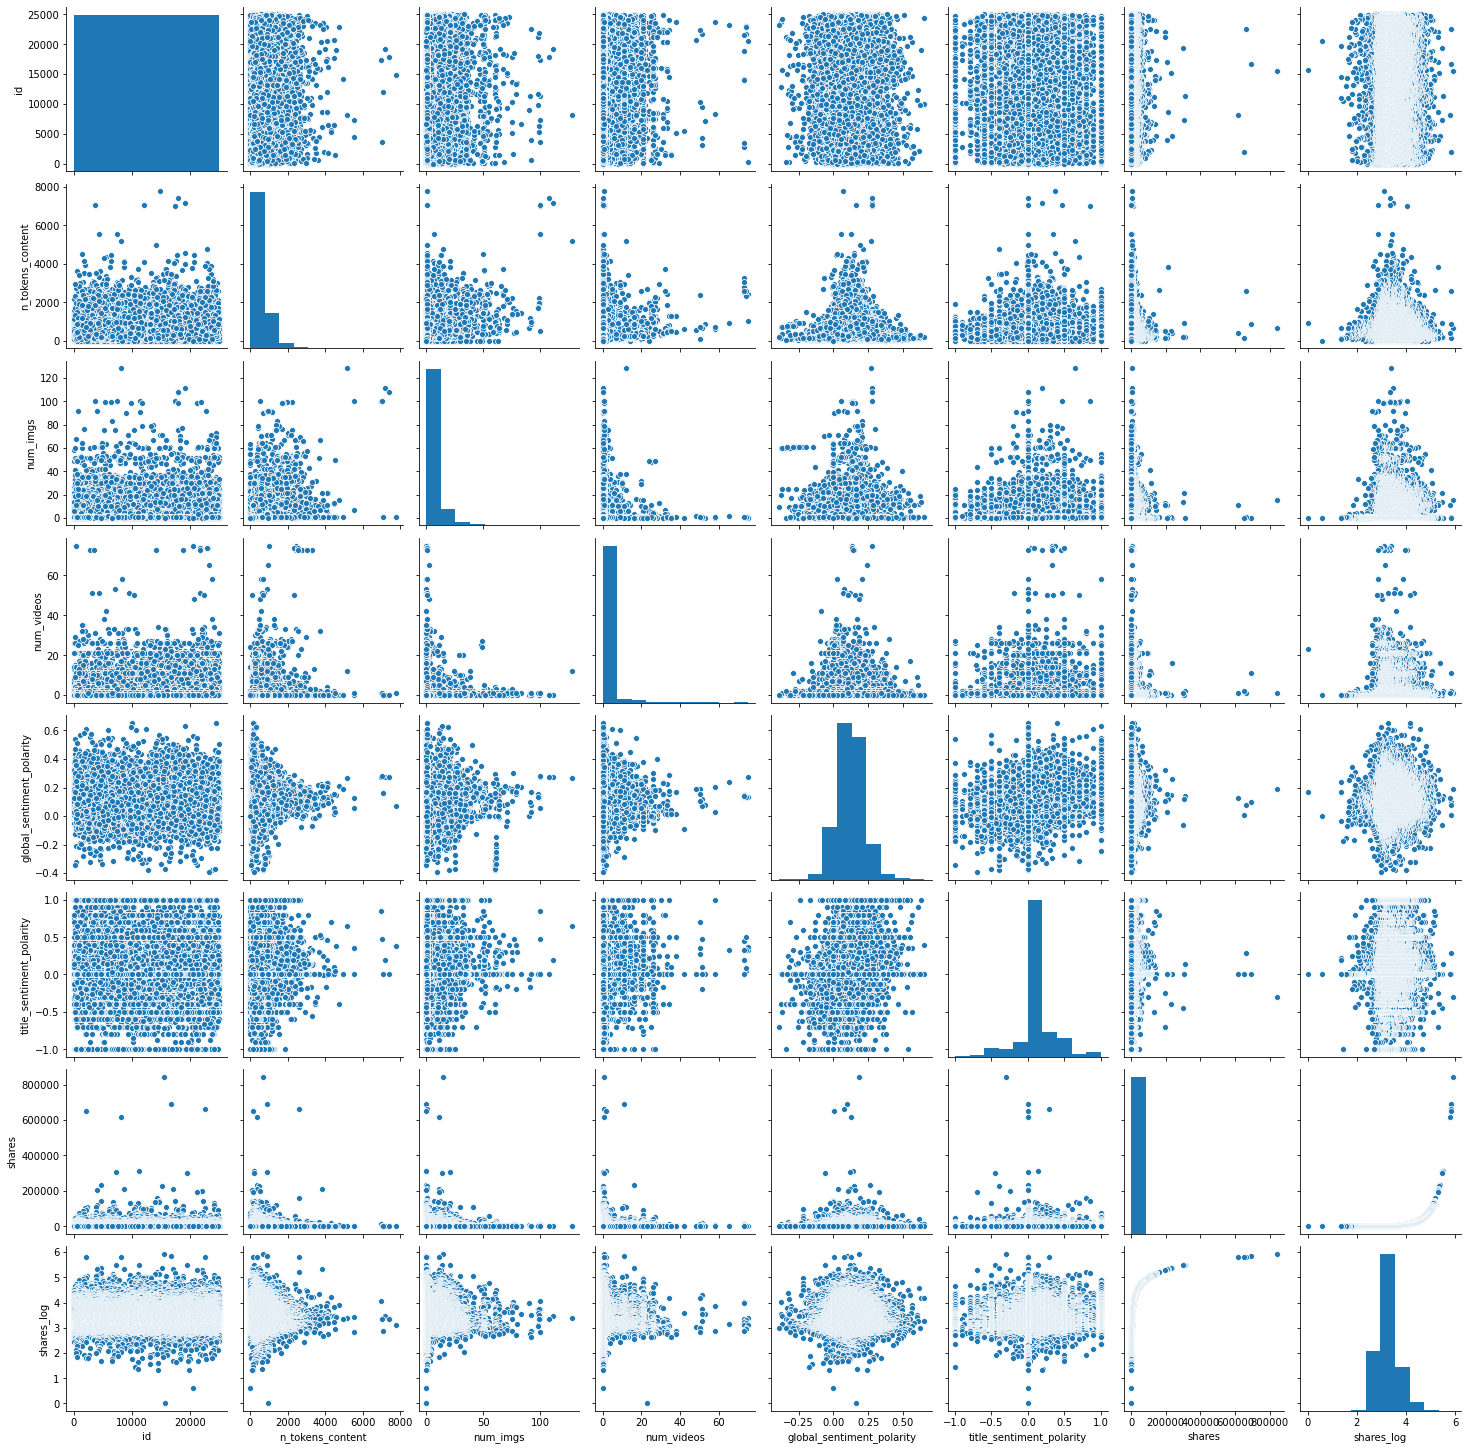

In [34]:
sns.pairplot(df)
plt.show()

In the bottom two rows we can see shares and shares_log on the Y-axis. All variables seem to correlate with shares_log, such as "num_imgs", "num_videos" and "n_tokens_content". We can make a correlation matrix to make things more clear. 

Let's put them all in a linear model. For sk-learn to work, we first need to create separate X and Y that include only the variables that we want to use.

In [35]:
df.corr()

,id,n_tokens_content,num_imgs,num_videos,global_sentiment_polarity,title_sentiment_polarity,shares,shares_log
id,1.000000,0.002121,-0.001707,-0.000009,-0.002630,-0.010912,-0.000407,-0.003900
n_tokens_content,0.002121,1.000000,0.357047,0.097596,0.014327,0.028852,0.009625,0.032897
num_imgs,-0.001707,0.357047,1.000000,-0.073084,0.014196,0.046353,0.037395,0.085575
num_videos,-0.000009,0.097596,-0.073084,1.000000,-0.027871,0.021671,0.025691,0.037147
global_sentiment_polarity,-0.002630,0.014327,0.014196,-0.027871,1.000000,0.238290,0.008655,0.053199
title_sentiment_polarity,-0.010912,0.028852,0.046353,0.021671,0.238290,1.000000,0.009655,0.050216
shares,-0.000407,0.009625,0.037395,0.025691,0.008655,0.009655,1.000000,0.483322
shares_log,-0.003900,0.032897,0.085575,0.037147,0.053199,0.050216,0.483322,1.000000


The correlations with *shares_log* are strongest for *num_imgs* (with 0.085), *global_sentiment_polarity* (with 0.053) and *title_sentiment_polarity* (with 0.050) (in descending order). 

As long as you have enough data, we can include many variables. Let's put them all in a linear model. For sk-learn to work, we first need to create separate X and Y that include only the variables that we want to use.

In [105]:
y = df['shares_log'] #We need to take out the rating as our Y-variable
X = df.loc[:,'n_tokens_content':'title_sentiment_polarity'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
# X = df.loc[:,'n_tokens_content':'title_sentiment_polarity'] #this slices the dataframe to include all rows and the columns from "action" to "metascore"
X.index = df['id'] #this stores the movie names in the column names, so we don't lose track of them later
X.head()

,n_tokens_content,num_imgs,num_videos,global_sentiment_polarity,title_sentiment_polarity
id,,,,,
15509,688,15,1,0.186037,-0.300000
16737,893,0,11,0.100533,0.000000
22573,2591,1,1,0.075724,0.285714
2023,134,0,2,0.004040,0.000000
8129,382,11,1,0.125005,0.000000


We now have our X and y, and can start training the model. First, let's split the data into a training set and a test set.

In [106]:
#This built-in function from sk-learn splits the data set randomly into a train set and a test set
#By stating random_state = 1, we use one particular "random state" (we could use any number, it's a so-called "random seed"). 
#This means if we run the code again, it will produce the same results. Which can be handy.
#test_size = 0.3, so I'm splitting the data into 70% training data and 30% test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables
X_train.head() #The train data

,n_tokens_content,num_imgs,num_videos,global_sentiment_polarity,title_sentiment_polarity
id,,,,,
11366,323,1,0,0.229769,0.00
8277,832,3,0,0.133080,0.45
7914,611,2,1,0.055540,0.20
20364,312,6,0,0.210185,0.00
18183,564,70,1,-0.068837,0.00


Now, let's train the linear model.

In [107]:
lm = LinearRegression() #create the model
model = lm.fit(X_train, y_train) #train the model

Let's have a look at the coefficients.

In [110]:
coef = pd.DataFrame(X.columns.values, lm.coef_) #this creates a df with a column with the column names, and the coefficients of the model
coef

,0
-0.000003,n_tokens_content
0.003765,num_imgs
0.003596,num_videos
0.225787,global_sentiment_polarity
0.055532,title_sentiment_polarity


We can interpret these coefficients as follows:

* The intercept makes no sense and does not need to be interpreted. Why not? Because it's the value when all X's are 0. So "runtime" is 0, which is impossible.
* A higher title_sentiment_polarity influences the shares by 0.0555 but I'm not sure how that score is attributed
* A higher global_sentiment_polarity influences the shares by 0.225 but I'm not sure how that score is attributed
* If a content has more images, it adds 0.0037 to its shares
* If a content has more vieos, it adds 0.0035 to its shares
* The tokens of content have a tiny negative effect

Finally, let's look at the model performance. We'll generate predictions and calculate the R^2 and RMSE.

**Remember that we are always looking at performance on the test data!**

In [111]:
y_test_p = lm.predict(X_test) #Generate predictions for the test data. So we use X.test, not X.train
r2_score(y_test, y_test_p)

0.013383198230859317

The R^2 is 0.0133, which means 1% of the variation in shares is explained by the model. That's not great. Let's calculate the RMSE: the root mean squared error.

In [112]:
math.sqrt(mean_squared_error(y_test, y_test_p))

0.41043024948941903

The RMSE is 0.41. Which means that we are typically about 0.41 off in our predicted rating (which goes from ??????). Finally, let's plot the predicted value against the actual rating.

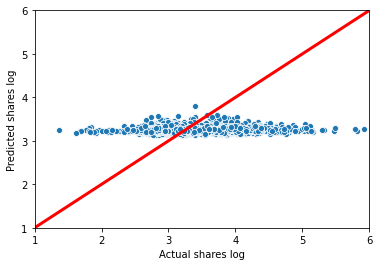

In [101]:
sns.scatterplot(y_test, y_test_p)
plt.xlabel('Actual shares log')
plt.ylabel('Predicted shares log')
plt.xlim([1,6]) #Forcing the x- and y-axis to be the same length, so that we can compare 
plt.ylim([1,6])
plt.plot([1, 6], [1, 6], color='red', lw=3) #Plot a diagonal length
plt.show()

The predictions are not very balanced. The model predicts everything in a very narrow range of numbers between 3-4 whereas the actual shares are anywhere between 0-6. Overall the model is not doing a great job. Maybe it's overfitting?